In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [65]:
def kmeans_ward(input_x, num_clusters, tol, max_it, num_pontos_rand):
    '''
    Função que aplica a metodologia KMeans com inicialização Ward para clusterização de dados.
    Dados de entrada:
        input_x: (np.array) dados de entradas a serem clusterizados
        num_clusters: (int) número de grupos de clusterização 
        tol: (float) tolerância maxima do algoritimo de clusterização
        max_it: número máximo de iterações que o algorítimo poderá percorrer
        num_pontos_rans: o número de pontos do dados de entrada que devem ser usados          para calcular novo ponto central
    Saída:
        output_x: (np.array) dados de entrada classificados em grupos
        cluster_central: os pontos do cluster central final obtido
    '''
    x_min = np.amin(input_x)
    x_max = np.amax(input_x)
    output_x = np.zeros((input_x.shape[0], input_x.shape[1]+1))
    output_x[:,:-1] = input_x
    categories = range(num_clusters)
    means = np.zeros((num_clusters, 2))
    cluster_centers = np.zeros((num_clusters, 2))


    random_indices = input_x[np.random.choice(input_x.shape[0], num_clusters*num_pontos_rand, replace=False), :]
    
    for cluster in categories:
        means[cluster] = np.mean(random_indices[(cluster)*(num_pontos_rand):(cluster+1)*(num_pontos_rand), :], axis=0)
    
    cluster_centers = np.copy(means)

    x = True
    num_it = 0

    while x:
        old_cluster_centers = np.copy(cluster_centers)

        for i in range(input_x.shape[0]):
            dist = []
            for cluster_center in cluster_centers:
                dist.append(np.linalg.norm(input_x[i]-cluster_center))
            output_x[i,-1] = dist.index(min(dist))
        
        for category in categories:
            in_category = output_x[output_x[:,-1] == category]
            in_category = in_category[:, :-1]
            means[category] = np.mean(in_category, axis=0)
            cluster_centers[category] = means[category]
        
        ind_temp = 0
        
        for j, cluster_center in enumerate(cluster_centers):
            dist = []
            for i in range(input_x.shape[0]):
                dist.append(np.linalg.norm(input_x[i]-cluster_center))
            ind_temp = (np.argpartition(dist, num_pontos_rand)[:num_pontos_rand])
            
            means[j] = np.mean(input_x[ind_temp], axis=0)
            cluster_centers[j] = means[j]

        num_it += 1

        if ((old_cluster_centers - cluster_centers) <= tol).all() or num_it >= max_it: 
            x = False
            
    return(output_x, cluster_centers)

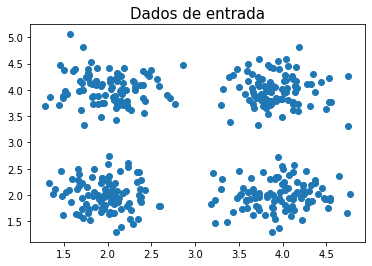

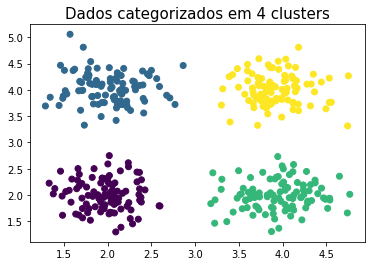

In [66]:
C1 = (2, 2)
C2 = (4, 4)
C3 = (2, 4)
C4 = (4, 2)
S = 0.3
N = 100

k_value = 4
tol = 0
max_pontos = 10
max_it = 1000

xc1 = np.random.normal(loc=C1, scale=S, size=(N,2))
xc2 = np.random.normal(loc=C2, scale=S, size=(N,2))
xc3 = np.random.normal(loc=C3, scale=S, size=(N,2))
xc4 = np.random.normal(loc=C4, scale=S, size=(N,2))

x = np.concatenate([xc1, xc2, xc3, xc4])

plt.scatter(x[:,0], x[:,1])
plt.title(f'Dados de entrada', size = 15)
plt.show()

output, cluster_centers = kmeans_ward(x, k_value, tol, max_it, max_pontos)
plt.title(f'Dados categorizados em {k_value} clusters', size = 15)
plt.scatter(output[:,0], output[:,1], c=output[:,-1])
plt.show()